# Task1

# A

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
path_train = "https://archive.ics.uci.edu/static/public/464/superconductivty+data.zip"

zip_file_path = "superconductivty+data.zip"
df_train_path = "train.csv" 
df_unique_m = "unique_m.csv"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(df_train_path)
    zip_ref.extract(df_unique_m)

df_train = pd.read_csv(df_train_path)
df_unique_m = pd.read_csv(df_unique_m)

In [3]:
X = df_train.drop('critical_temp', axis=1)
y = df_train['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_score = linear_reg.score(X_test, y_test)
print("Linear Regression Score:", linear_reg_score)


Linear Regression Score: 0.7376312737138968


In [4]:
ridge = Ridge().fit(X_train, y_train)
print("Train score ridge: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score ridge: {:.2f}".format(ridge.score(X_test, y_test)))
print('\n')


ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Train score ridge10 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test score ridge10: {:.2f}".format(ridge10.score(X_test, y_test)))
print('\n')


ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Train score ridge01: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test score ridge01: {:.2f}".format(ridge01.score(X_test, y_test)))
print('\n')


ridge001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("Train score ridge001: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Test score ridge001: {:.2f}".format(ridge001.score(X_test, y_test)))
print('\n')


ridge0001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("Train score ridge0001: {:.2f}".format(ridge0001.score(X_train, y_train)))
print("Test score ridge0001: {:.2f}".format(ridge0001.score(X_test, y_test)))
print('\n')


lasso = Lasso(max_iter=100000).fit(X_train, y_train)
print("Train score lasso: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test score lasso: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Train score ridge: 0.74
Test score ridge: 0.74


Train score ridge10 : 0.73
Test score ridge10: 0.74


Train score ridge01: 0.74
Test score ridge01: 0.74


Train score ridge001: 0.74
Test score ridge001: 0.74


Train score ridge0001: 0.74
Test score ridge0001: 0.74


Train score lasso: 0.71
Test score lasso: 0.71
Number of features used: 47


In [5]:
# Train a Random Forest Regressor model
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_score = random_forest.score(X_test, y_test)
print("Random Forest Regressor Score:", random_forest_score)


Random Forest Regressor Score: 0.9297785551963805


# B

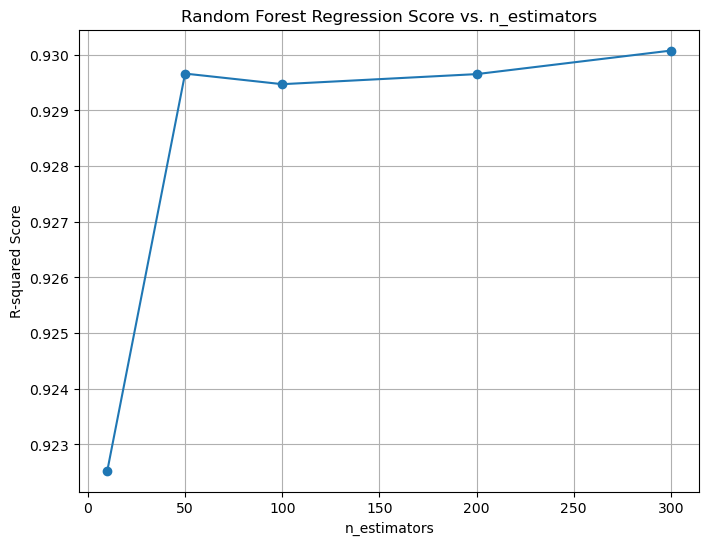

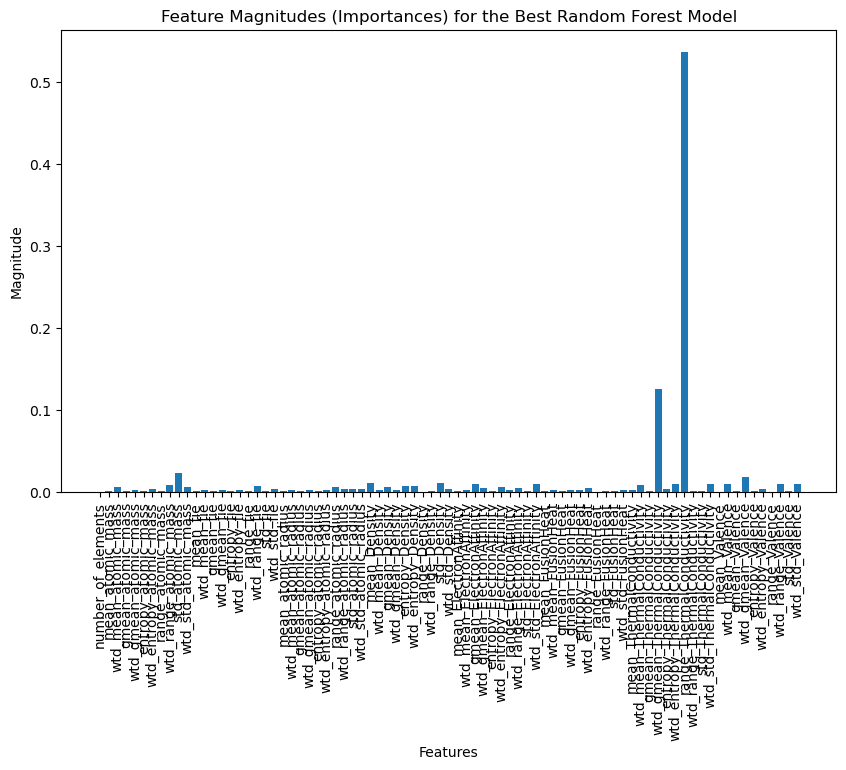

In [6]:
from sklearn.metrics import r2_score

n_estimators_values = [10, 50, 100, 200, 300]  # Vary the number of trees
scores = []
best_model = None
best_score = -float("inf")

for n_estimators in n_estimators_values:
    random_forest = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)
    random_forest.fit(X_train, y_train)

    random_forest_pred = random_forest.predict(X_test)

    score = r2_score(y_test, random_forest_pred)
    scores.append(score)

    if score > best_score:
        best_score = score
        best_model = random_forest

plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, scores, marker='o')
plt.title("Random Forest Regression Score vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("R-squared Score")
plt.grid()
plt.show()

feature_magnitudes = best_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_magnitudes)), feature_magnitudes, tick_label=X.columns)
plt.title("Feature Magnitudes (Importances) for the Best Random Forest Model")
plt.xlabel("Features")
plt.ylabel("Magnitude")
plt.xticks(rotation=90)
plt.show()


Best Random Forest Score: 0.9301837785279972 (n_estimators = 100)


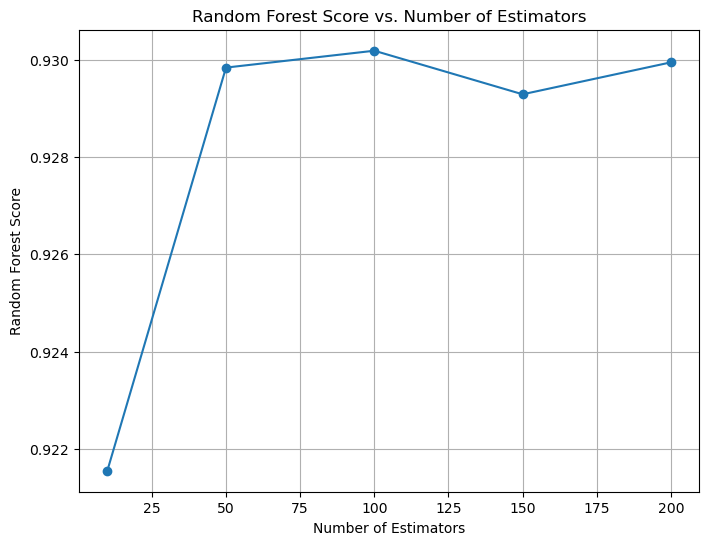

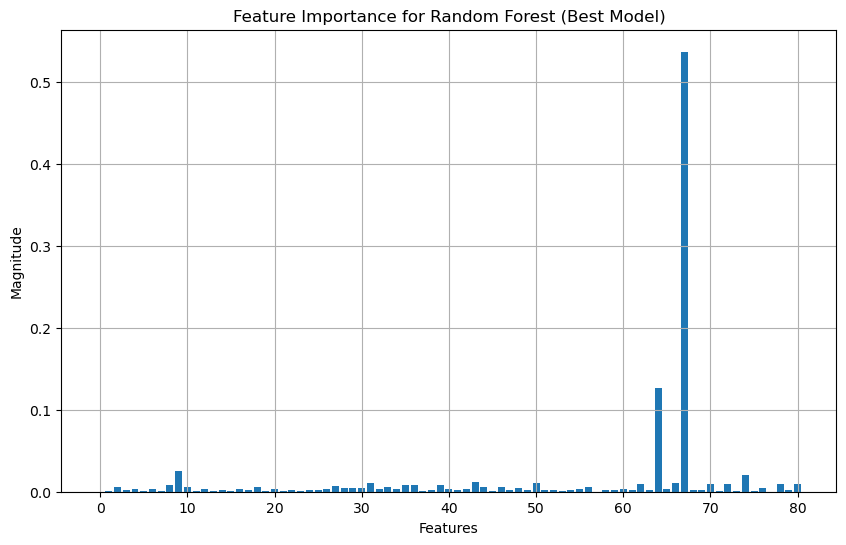

In [7]:
scores = []
parameter_values = [10, 50, 100, 150, 200]

for n_estimators in parameter_values:
    random_forest = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)
    random_forest.fit(X_train, y_train)
    score = random_forest.score(X_test, y_test)
    scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(parameter_values, scores, marker='o')
plt.title('Random Forest Score vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Random Forest Score')
plt.grid(True)

best_score = max(scores)
best_parameter = parameter_values[scores.index(best_score)]
print(f"Best Random Forest Score: {best_score} (n_estimators = {best_parameter})")

best_random_forest = RandomForestRegressor(n_estimators=best_parameter)
best_random_forest.fit(X_train, y_train)

# Plot the feature importances for the best Random Forest model
plt.figure(figsize=(10, 6))
feature_indices = range(len(best_random_forest.feature_importances_))
plt.bar(feature_indices, best_random_forest.feature_importances_)
plt.title('Feature Importance for Random Forest (Best Model)')
plt.xlabel('Features')
plt.ylabel('Magnitude')
plt.grid(True)

plt.show()

# Task2

# A

In [8]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

df_drug = pd.read_csv(dataset_url, header=None)

df_drug.columns = ["ID","neuroticism", "extraversion", "openness to experience", "agreeableness", "conscientiousness", 
                   "impulsivity", "sensation seeking", "level of education", "age", "gender", "country of residence", 
                   "ethnicity", "alcohol", "amphetamines", "amyl nitrite", "benzodiazepine", "cannabis", "chocolate", 
                   "cocaine", "caffeine", "crack", "ecstasy", "heroin", "ketamine", "legal highs", "LSD", "methadone", 
                   "mushrooms", "nicotine", "volatile substance abuse", "Semeron"]

print(df_drug.head())


   ID  neuroticism  extraversion  openness to experience  agreeableness  \
0   1      0.49788       0.48246                -0.05921        0.96082   
1   2     -0.07854      -0.48246                 1.98437        0.96082   
2   3      0.49788      -0.48246                -0.05921        0.96082   
3   4     -0.95197       0.48246                 1.16365        0.96082   
4   5      0.49788       0.48246                 1.98437        0.96082   

   conscientiousness  impulsivity  sensation seeking  level of education  \
0            0.12600      0.31287           -0.57545            -0.58331   
1           -0.31685     -0.67825            1.93886             1.43533   
2           -0.31685     -0.46725            0.80523            -0.84732   
3           -0.31685     -0.14882           -0.80615            -0.01928   
4           -0.31685      0.73545           -1.63340            -0.45174   

       age  ...  ecstasy  heroin  ketamine legal highs  LSD methadone  \
0 -0.91699  ...    

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


class_mapping = {
    "CL0": 0,
    "CL1": 1,
    "CL2": 2,
    "CL3": 3,
    "CL4": 4,
    "CL5": 5,
    "CL6": 6
}

X = df_drug[["neuroticism", "extraversion", "openness to experience", "agreeableness", "conscientiousness", "impulsivity", "sensation seeking", "level of education", "age", "gender", "country of residence", "ethnicity"]]
y_alcohol = df_drug["alcohol"].map(class_mapping)
y_caffeine = df_drug["caffeine"].map(class_mapping)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


X_train, X_test, y_alcohol_train, y_alcohol_test = train_test_split(X, y_alcohol, test_size=0.2, random_state=42)
X_train, X_test, y_caffeine_train, y_caffeine_test = train_test_split(X, y_caffeine, test_size=0.2, random_state=42)

logistic_regression_model_alcohol = LogisticRegression(max_iter=1000)
logistic_regression_model_alcohol.fit(X_train, y_alcohol_train)

y_alcohol_pred = logistic_regression_model_alcohol.predict(X_test)

accuracy_alcohol = accuracy_score(y_alcohol_test, y_alcohol_pred)

logistic_regression_model_caffeine = LogisticRegression(max_iter=1000)
logistic_regression_model_caffeine.fit(X_train, y_caffeine_train)

y_caffeine_pred = logistic_regression_model_caffeine.predict(X_test)

accuracy_caffeine = accuracy_score(y_caffeine_test, y_caffeine_pred)

print("Accuracy for Logistic Regression (alcohol):", accuracy_alcohol)
print("Accuracy for Logistic Regression (caffeine):", accuracy_caffeine)

Accuracy for Logistic Regression (alcohol): 0.3952254641909814
Accuracy for Logistic Regression (caffeine): 0.5702917771883289


In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

linear_svc_model_alcohol = LinearSVC(max_iter=10000, dual=False)
linear_svc_model_alcohol.fit(X_train, y_alcohol_train)

y_alcohol_pred = linear_svc_model_alcohol.predict(X_test)

accuracy_alcohol_svm = accuracy_score(y_alcohol_test, y_alcohol_pred)

linear_svc_model_caffeine = LinearSVC(max_iter=10000, dual=False)
linear_svc_model_caffeine.fit(X_train, y_caffeine_train)

y_caffeine_pred = linear_svc_model_caffeine.predict(X_test)

accuracy_caffeine_svm = accuracy_score(y_caffeine_test, y_caffeine_pred)

print("Accuracy for LinearSVC (alcohol):", accuracy_alcohol_svm)
print("Accuracy for LinearSVC (caffeine):", accuracy_caffeine_svm)


Accuracy for LinearSVC (alcohol): 0.4005305039787798
Accuracy for LinearSVC (caffeine): 0.5649867374005305


# B

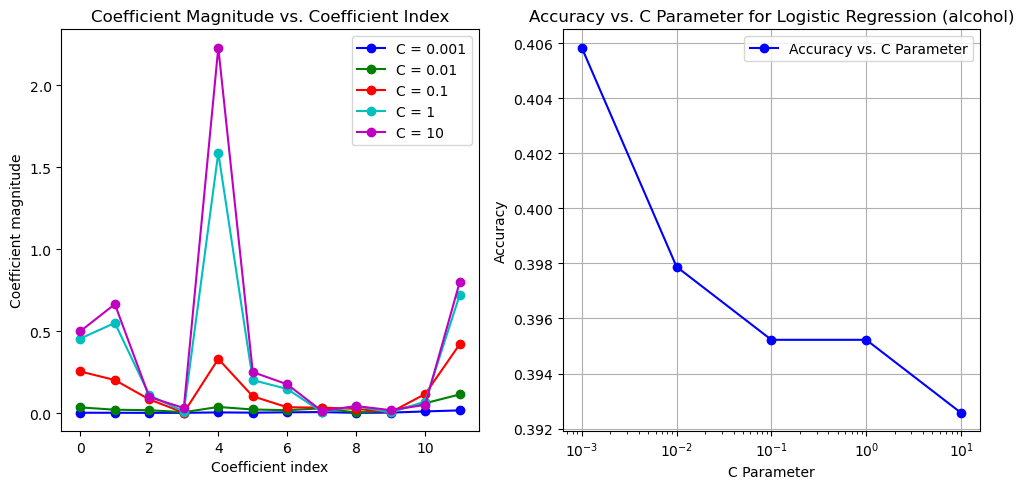

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define an array of different C values and their corresponding colors
C_values = [0.001, 0.01, 0.1, 1, 10]
colors = ['b', 'g', 'r', 'c', 'm']

accuracies = []
coefficients = []

for C, color in zip(C_values, colors):
    logistic_regression_model_alcohol = LogisticRegression(C=C, max_iter=1000 , solver ='lbfgs')
    logistic_regression_model_alcohol.fit(X_train, y_alcohol_train)

    y_alcohol_pred = logistic_regression_model_alcohol.predict(X_test)

    accuracy = accuracy_score(y_alcohol_test, y_alcohol_pred)
    accuracies.append(accuracy)

    coefficients.append(logistic_regression_model_alcohol.coef_[0])

plt.figure(figsize=(10, 5))

plt.subplot(121)
for i, color in enumerate(colors):
    plt.plot(np.abs(coefficients[i]), marker='o', label=f'C = {C_values[i]}', color=color)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.title('Coefficient Magnitude vs. Coefficient Index')
plt.legend()

# Plot the accuracies
plt.subplot(122)
plt.plot(C_values, accuracies, marker='o', color='b', label='Accuracy vs. C Parameter')
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C Parameter for Logistic Regression (alcohol)')
plt.xscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# C

In [14]:
features_to_predict = [
    "amphetamines", "amyl nitrite", "benzodiazepine", "cannabis", "chocolate", "cocaine", "caffeine",
    "crack", "ecstasy", "heroin", "ketamine", "legal highs", "LSD", "methadone", "mushrooms", "nicotine"
]

accuracy_results = {}

for feature_name in features_to_predict:
    target_variable = df_drug[feature_name].map(class_mapping)

    X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracy_results[feature_name] = accuracy

for feature_name, accuracy in accuracy_results.items():
    print(f"Accuracy for {feature_name}: {accuracy}")


Accuracy for amphetamines: 0.4960212201591512
Accuracy for amyl nitrite: 0.6816976127320955
Accuracy for benzodiazepine: 0.5384615384615384
Accuracy for cannabis: 0.7320954907161804
Accuracy for chocolate: 0.41644562334217505
Accuracy for cocaine: 0.41379310344827586
Accuracy for caffeine: 0.5702917771883289
Accuracy for crack: 0.8859416445623343
Accuracy for ecstasy: 0.5464190981432361
Accuracy for heroin: 0.8594164456233422
Accuracy for ketamine: 0.8169761273209549
Accuracy for legal highs: 0.6206896551724138
Accuracy for LSD: 0.5782493368700266
Accuracy for methadone: 0.7374005305039788
Accuracy for mushrooms: 0.5013262599469496
Accuracy for nicotine: 0.3925729442970822


In [15]:
from sklearn.metrics import classification_report

features_to_predict = [
    "amphetamines", "amyl nitrite", "benzodiazepine", "cannabis", "chocolate", "cocaine", "caffeine",
    "crack", "ecstasy", "heroin", "ketamine", "legal highs", "LSD", "methadone", "mushrooms", "nicotine"
]

classification_reports = {}

for feature_name in features_to_predict:
    target_variable = df_drug[feature_name]

    X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, zero_division=1)

    classification_reports[feature_name] = report

for feature_name, report in classification_reports.items():
    print(f"Classification Report for {feature_name}:\n{report}")


Classification Report for amphetamines:
              precision    recall  f1-score   support

         CL0       0.55      0.87      0.68       196
         CL1       0.21      0.06      0.09        53
         CL2       0.00      0.00      1.00        46
         CL3       0.26      0.29      0.27        42
         CL4       0.00      0.00      1.00        13
         CL5       1.00      0.00      0.00        11
         CL6       0.25      0.06      0.10        16

    accuracy                           0.50       377
   macro avg       0.32      0.18      0.45       377
weighted avg       0.39      0.50      0.56       377

Classification Report for amyl nitrite:
              precision    recall  f1-score   support

         CL0       0.70      0.97      0.81       261
         CL1       0.22      0.04      0.07        45
         CL2       0.30      0.07      0.11        44
         CL3       1.00      0.00      0.00        20
         CL4       1.00      0.00      0.00         

# D

In [16]:
df_drug['s1_amphetamines'] = df_drug['amphetamines'].map({'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1})
df_drug['s1_cannabis'] = df_drug['cannabis'].map({'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1})
df_drug['s1_ecstasy'] = df_drug['ecstasy'].map({'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1})

df_drug['s2_amphetamines'] = df_drug['amphetamines'].map({'CL0': 0, 'CL1': 0, 'CL2': 0, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1})
df_drug['s2_cannabis'] = df_drug['cannabis'].map({'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 0, 'CL4': 1, 'CL5': 1, 'CL6': 1})
df_drug['s2_ecstasy'] = df_drug['ecstasy'].map({'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 0, 'CL4': 1, 'CL5': 1, 'CL6': 1})

df_drug['s3_amphetamines'] = df_drug['amphetamines'].map({'CL0': 0, 'CL1': 0, 'CL2': 0, 'CL3': 0, 'CL4': 1, 'CL5': 1, 'CL6': 1})
df_drug['s3_cannabis'] = df_drug['cannabis'].map({'CL0': 0, 'CL1': 0, 'CL2': 0, 'CL3': 0, 'CL4': 1, 'CL5': 1, 'CL6': 1})
df_drug['s3_ecstasy'] = df_drug['ecstasy'].map({'CL0': 0, 'CL1': 0, 'CL2': 0, 'CL3': 0, 'CL4': 1, 'CL5': 1, 'CL6': 1})

In [17]:
from sklearn.metrics import accuracy_score

accuracy_results = {}

features_to_predict = ['s1_amphetamines', 's1_cannabis', 's1_ecstasy' , 's2_amphetamines' , 's2_cannabis' , 's2_ecstasy' ,
                       's3_amphetamines' , 's3_cannabis' , 's3_ecstasy' ]

for feature_name in features_to_predict:
    target_variable = df_drug[feature_name]
    
    X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[feature_name] = accuracy

for feature_name, accuracy in accuracy_results.items():
    print(f"Accuracy for {feature_name}: {accuracy}")


Accuracy for s1_amphetamines: 0.713527851458886
Accuracy for s1_cannabis: 0.9787798408488063
Accuracy for s1_ecstasy: 0.7347480106100795
Accuracy for s2_amphetamines: 0.8116710875331565
Accuracy for s2_cannabis: 0.9442970822281167
Accuracy for s2_ecstasy: 0.7506631299734748
Accuracy for s3_amphetamines: 0.8912466843501327
Accuracy for s3_cannabis: 0.9257294429708223
Accuracy for s3_ecstasy: 0.8859416445623343


# Task3

In [18]:
from sklearn.datasets import load_linnerud

# Load the Linnerud dataset
linnerud = load_linnerud()

# Access the data and target arrays
X = linnerud.data  # Input features
y = linnerud.target  # Target/output features

# Display the shape of the input and target arrays
print("Input Features (X) Shape:", X.shape)
print("Target/Output (y) Shape:", y.shape)


Input Features (X) Shape: (20, 3)
Target/Output (y) Shape: (20, 3)


In [19]:
feature_names = linnerud.feature_names

# Print the feature names
print("Feature Names:")
for i, feature_name in enumerate(feature_names):
    print(f"Feature {i + 1}: {feature_name}")

Feature Names:
Feature 1: Chins
Feature 2: Situps
Feature 3: Jumps


In [20]:
target_names = linnerud.target_names

# Print the target names
print("Target Names:")
for i, target_name in enumerate(target_names):
    print(f"Target {i + 1}: {target_name}")

Target Names:
Target 1: Weight
Target 2: Waist
Target 3: Pulse


In [21]:
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer
# Load the Linnerud dataset
linnerud_data = load_linnerud()

features = linnerud_data.data

scaler = StandardScaler()

normalized_features = scaler.fit_transform(features)

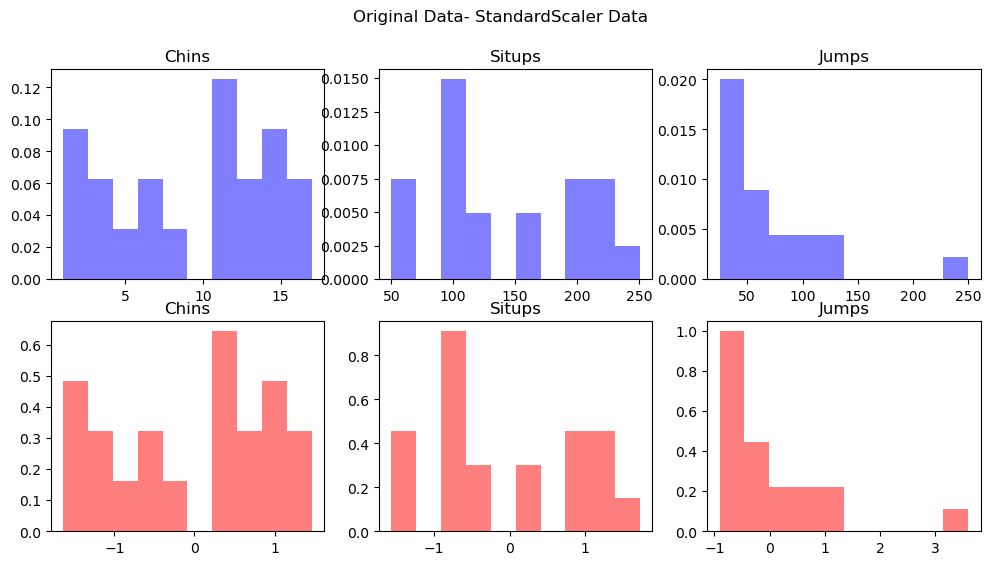

In [22]:
import matplotlib.pyplot as plt

# Original Data
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Original Data")

for i in range(3):
    axes[0, i].hist(features[:, i], bins=10, alpha=0.5, color='blue', density=True)
    axes[0, i].set_title(linnerud_data.feature_names[i])

# Normalized Data
fig.suptitle("Original Data- StandardScaler Data")

for i in range(3):
    axes[1, i].hist(normalized_features[:, i], bins=10, alpha=0.5, color='red', density=True)
    axes[1, i].set_title(linnerud_data.feature_names[i])

plt.show()

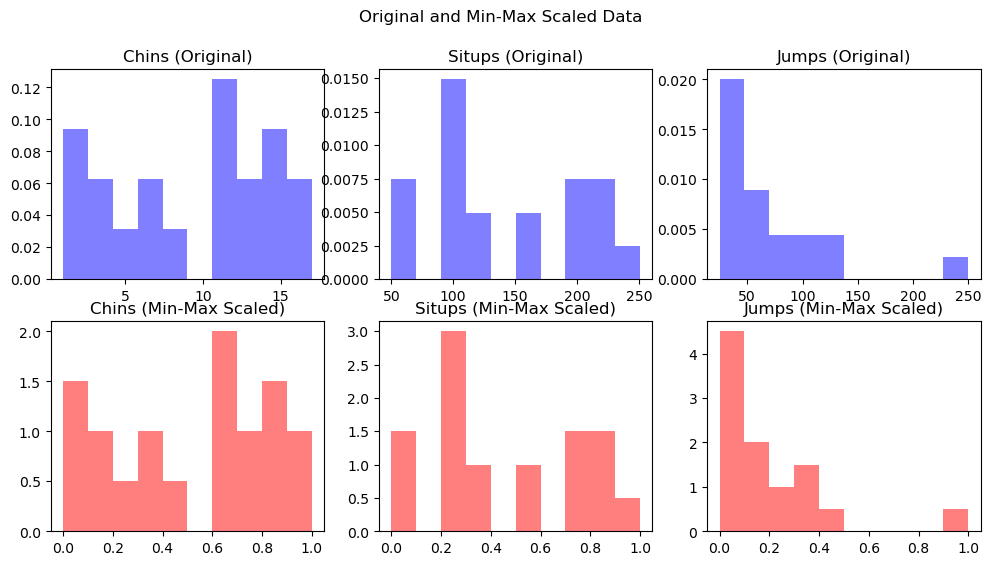

In [23]:
scaler = MinMaxScaler()

normalized_features = scaler.fit_transform(features)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Original and Min-Max Scaled Data")

for i in range(3):
    axes[0, i].hist(features[:, i], bins=10, alpha=0.5, color='blue', density=True)
    axes[0, i].set_title(linnerud_data.feature_names[i] + " (Original)")

for i in range(3):
    axes[1, i].hist(normalized_features[:, i], bins=10, alpha=0.5, color='red', density=True)
    axes[1, i].set_title(linnerud_data.feature_names[i] + " (Min-Max Scaled)")

plt.show()

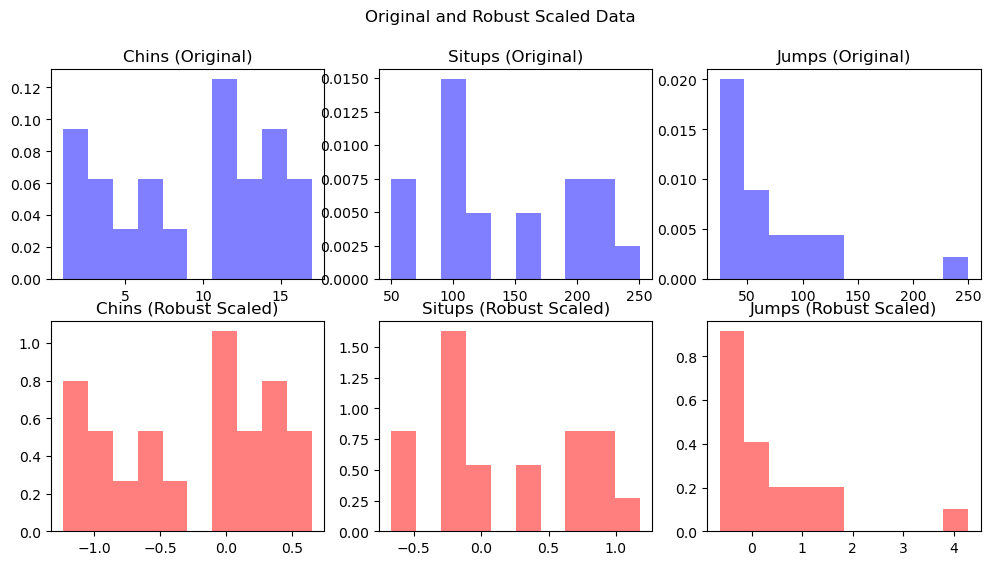

In [24]:
scaler = RobustScaler()

normalized_features = scaler.fit_transform(features)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Original and Robust Scaled Data")

for i in range(3):
    axes[0, i].hist(features[:, i], bins=10, alpha=0.5, color='blue', density=True)
    axes[0, i].set_title(linnerud_data.feature_names[i] + " (Original)")

for i in range(3):
    axes[1, i].hist(normalized_features[:, i], bins=10, alpha=0.5, color='red', density=True)
    axes[1, i].set_title(linnerud_data.feature_names[i] + " (Robust Scaled)")

plt.show()

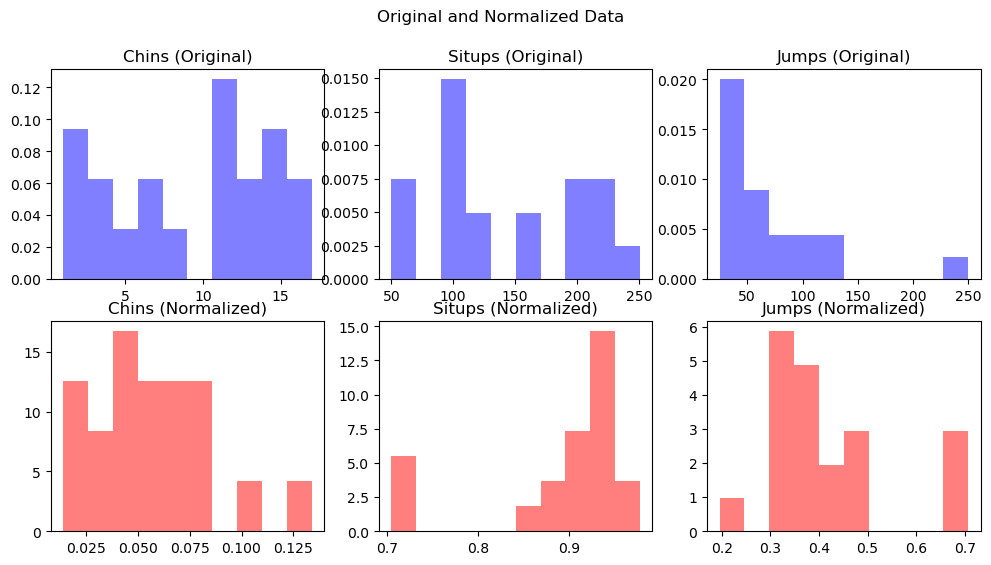

In [25]:
normalizer = Normalizer()

normalized_features = normalizer.transform(features)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Original and Normalized Data")

for i in range(3):
    axes[0, i].hist(features[:, i], bins=10, alpha=0.5, color='blue', density=True)
    axes[0, i].set_title(linnerud_data.feature_names[i] + " (Original)")

for i in range(3):
    axes[1, i].hist(normalized_features[:, i], bins=10, alpha=0.5, color='red', density=True)
    axes[1, i].set_title(linnerud_data.feature_names[i] + " (Normalized)")

plt.show()

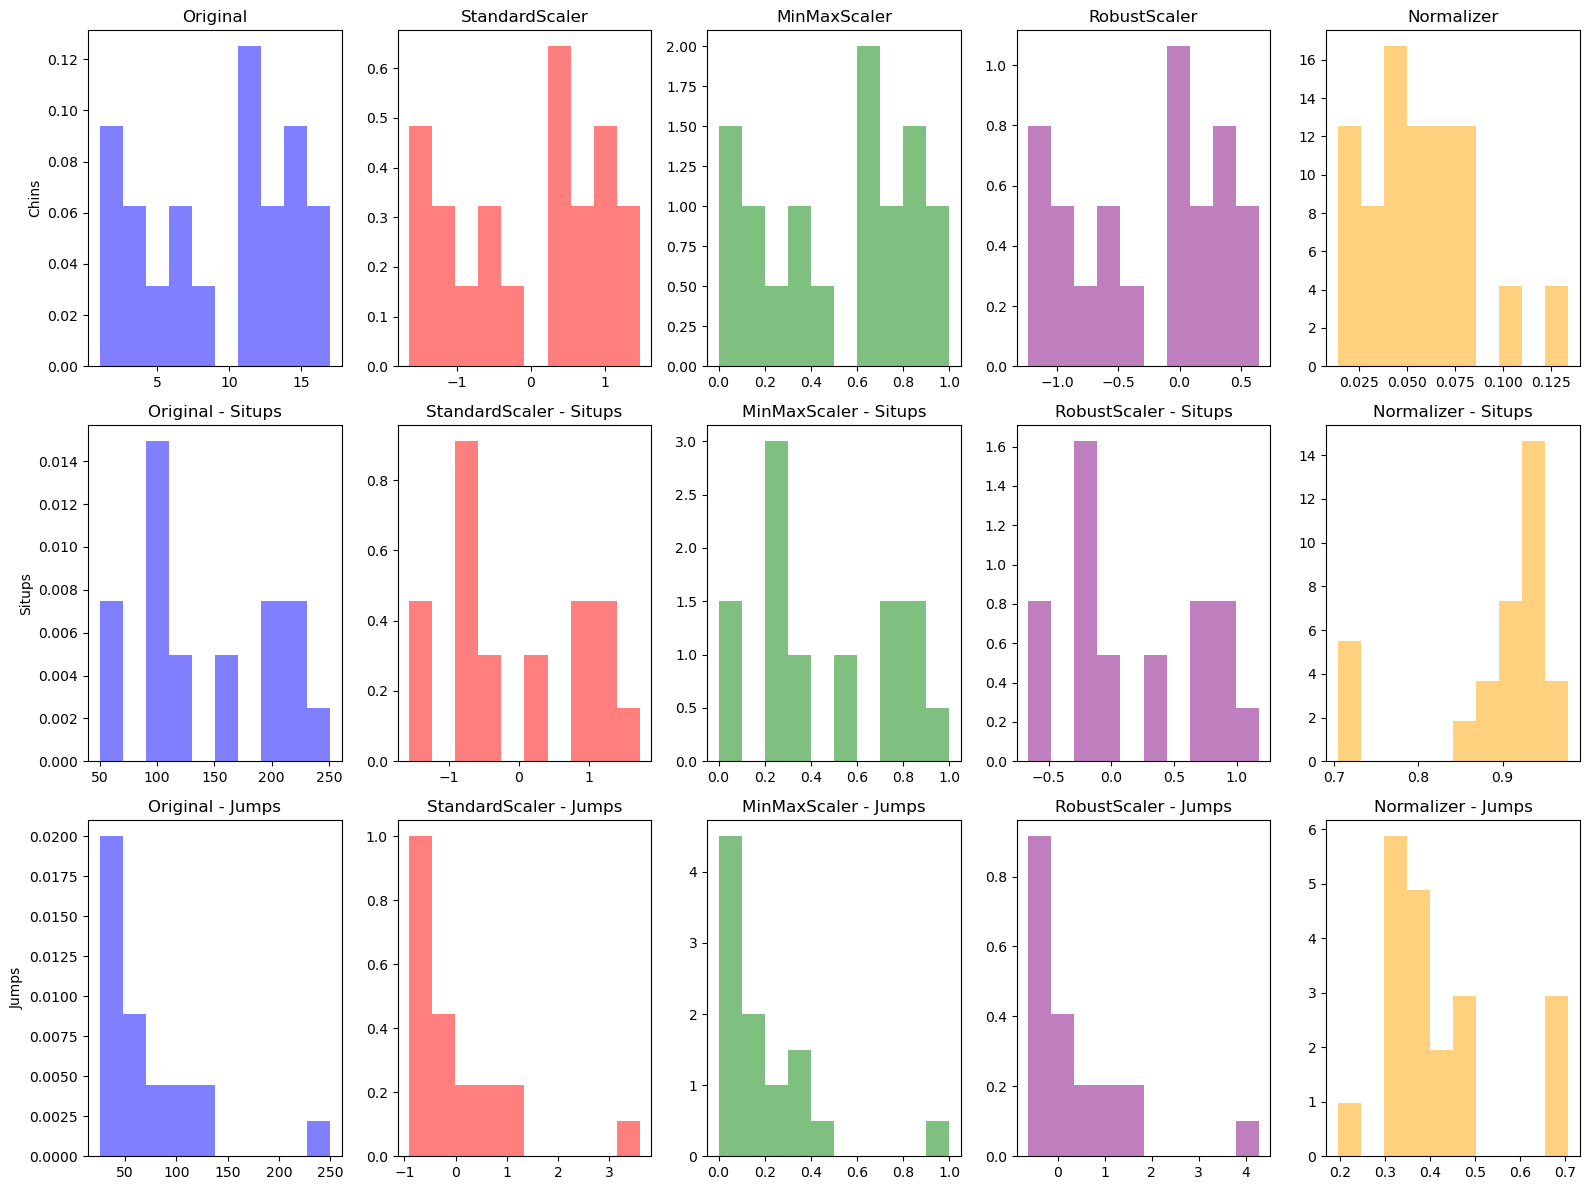

In [26]:

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer()
}

fig, axes = plt.subplots(3, 5, figsize=(16, 12))

for feature_idx, feature_name in enumerate(linnerud_data.feature_names):
    axes[feature_idx, 0].hist(features[:, feature_idx], bins=10, alpha=0.5, color='blue', density=True)
    axes[feature_idx, 0].set_title(f'Original - {feature_name}')

    for scaler_idx, (scaler_name, scaler) in enumerate(scalers.items()):
        normalized_features = scaler.fit_transform(features)

        color = ['red', 'green', 'purple', 'orange'][scaler_idx]
        axes[feature_idx, scaler_idx + 1].hist(normalized_features[:, feature_idx], bins=10, alpha=0.5, color=color, density=True)
        axes[feature_idx, scaler_idx + 1].set_title(f'{scaler_name} - {feature_name}')

row_labels = linnerud_data.feature_names
col_labels = ['Original'] + list(scalers.keys())

for i, label in enumerate(row_labels):
    axes[i, 0].set_ylabel(label)

for j, label in enumerate(col_labels):
    axes[0, j].set_title(label)

plt.tight_layout()
plt.show()


# Task 4

In [5]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

data = fetch_olivetti_faces(shuffle=True, random_state=42)


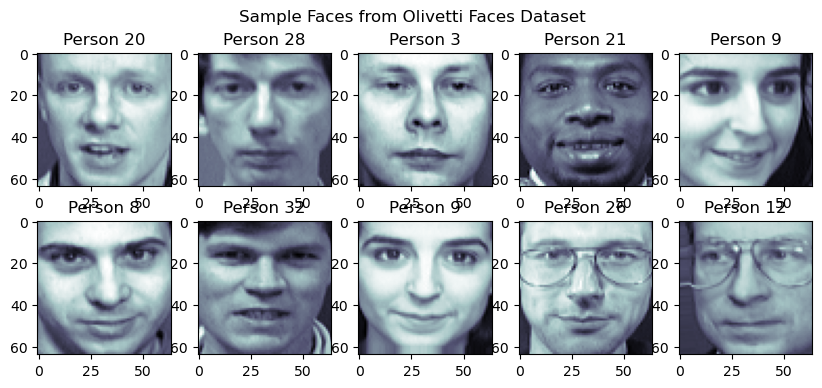

In [6]:
images = data.images  # ten different images of each of 40 distinct subjects
targets = data.target  # Array of target labels 

num_records = len(images)
num_features = images[0].size   

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i], cmap=plt.cm.bone)
    ax.set_title(f"Person {targets[i]}")
plt.suptitle("Sample Faces from Olivetti Faces Dataset")
plt.show()



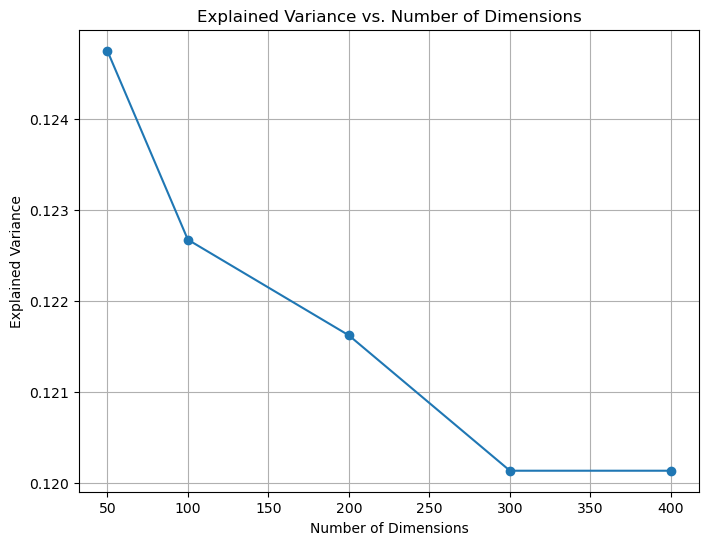

In [7]:
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC


X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dimension_values = [50, 100, 200, 300, 400]

explained_variances = []

for n_components in dimension_values:
    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.25)
    X_train_reduced = kpca.fit_transform(X_train)
    
    explained_variance = np.var(X_train_reduced) / np.var(X_train)
    explained_variances.append(explained_variance)
    
    svm = SVC(C=1.0, kernel='rbf')
    svm.fit(X_train_reduced, y_train)

plt.figure(figsize=(8, 6))
plt.plot(dimension_values, explained_variances, marker='o')
plt.title('Explained Variance vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()


In [30]:
from sklearn.cluster import KMeans
import pandas as pd

n_components_1 = 200
kpca_1 = KernelPCA(n_components=n_components_1, kernel='rbf', gamma=0.25)
X_reduced_1 = kpca_1.fit_transform(X)

n_components_2 = 100
kpca_2 = KernelPCA(n_components=n_components_2, kernel='rbf', gamma=0.25)
X_reduced_2 = kpca_2.fit_transform(X)

# Perform K-Means clustering with 40 clusters for reduced data
n_clusters = 40
kmeans_1 = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_2 = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_1.fit(X_reduced_1)
kmeans_2.fit(X_reduced_2)

# Get cluster assignments for both reduced datasets
cluster_assignments_1 = kmeans_1.labels_
cluster_assignments_2 = kmeans_2.labels_

# Create DataFrames to display true class vs. cluster assignments
true_vs_cluster_df_1 = pd.DataFrame({'True Class': y, 'Cluster': cluster_assignments_1})
true_vs_cluster_df_2 = pd.DataFrame({'True Class': y, 'Cluster': cluster_assignments_2})

# Print the distribution of true class vs. cluster for both reduced datasets
cluster_distributions_1 = true_vs_cluster_df_1.groupby(['Cluster', 'True Class']).size().unstack(fill_value=0)
cluster_distributions_2 = true_vs_cluster_df_2.groupby(['Cluster', 'True Class']).size().unstack(fill_value=0)

print("Cluster Distribution for n_components =", n_components_1)
print(cluster_distributions_1)

print("\nCluster Distribution for n_components =", n_components_2)
print(cluster_distributions_2)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster Distribution for n_components = 200
True Class  0   1   2   3   4   5   6   7   8   9   ...  30  31  32  33  34  \
Cluster                                             ...                       
0            0   0   0   0   0   0   0   0   0   0  ...   0   0   2   0   0   
1            0   0   0   0   2   0   0   0   0   0  ...   0   0   0   0   0   
2            1   0   0   1   1   0   0   0   0   0  ...   3   1   0   1   0   
3            0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
4            0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
5            0   0   0   0   2   0   0   0   0   0  ...   0   0   0   0   0   
6            2   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
7            0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
8            0   0   2   0   0   0   0   0   0   0  ...   0   0   0   0   0   
9            0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
10      